In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class',axis=1)

In [5]:
y = df['class']

In [6]:
X = pd.get_dummies(X,drop_first=True)

In [7]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

### Градиентный бустинг и поиск по сетке с кросс-валидацией

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {"n_estimators":[1,5,10,20,40,100],
              'learning_rate':[0.1,0.05,0.2],
              'max_depth':[3,4,5,6]
              }

In [28]:
 gb_model = GradientBoostingClassifier()

In [29]:
grid = GridSearchCV(gb_model,param_grid)

In [30]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [31]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [32]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [33]:
predictions = grid.predict(X_test)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [35]:
feat_import = grid.best_estimator_.feature_importances_

In [38]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Важность'])

In [39]:
imp_feats

,Важность
cap-shape_c,2.911502e-04
cap-shape_f,2.835932e-16
cap-shape_k,-2.347885e-23
cap-shape_s,0.000000e+00
cap-shape_x,1.210126e-16
...,...
habitat_l,0.000000e+00
habitat_m,8.997714e-17
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [40]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Важность,95.0,0.010526,0.064682,-2.347885e-23,0.0,1.210126e-16,0.000723,0.614744


In [42]:
imp_feats = imp_feats[imp_feats['Важность'] > 0.000527]

In [44]:
imp_feats.sort_values('Важность')

,Важность
ring-type_p,0.000539
odor_c,0.000624
stalk-color-below-ring_w,0.000822
odor_p,0.000921
cap-surface_g,0.001045
population_c,0.001174
ring-type_n,0.001266
population_y,0.001276
stalk-surface-below-ring_s,0.002053
cap-color_y,0.002311


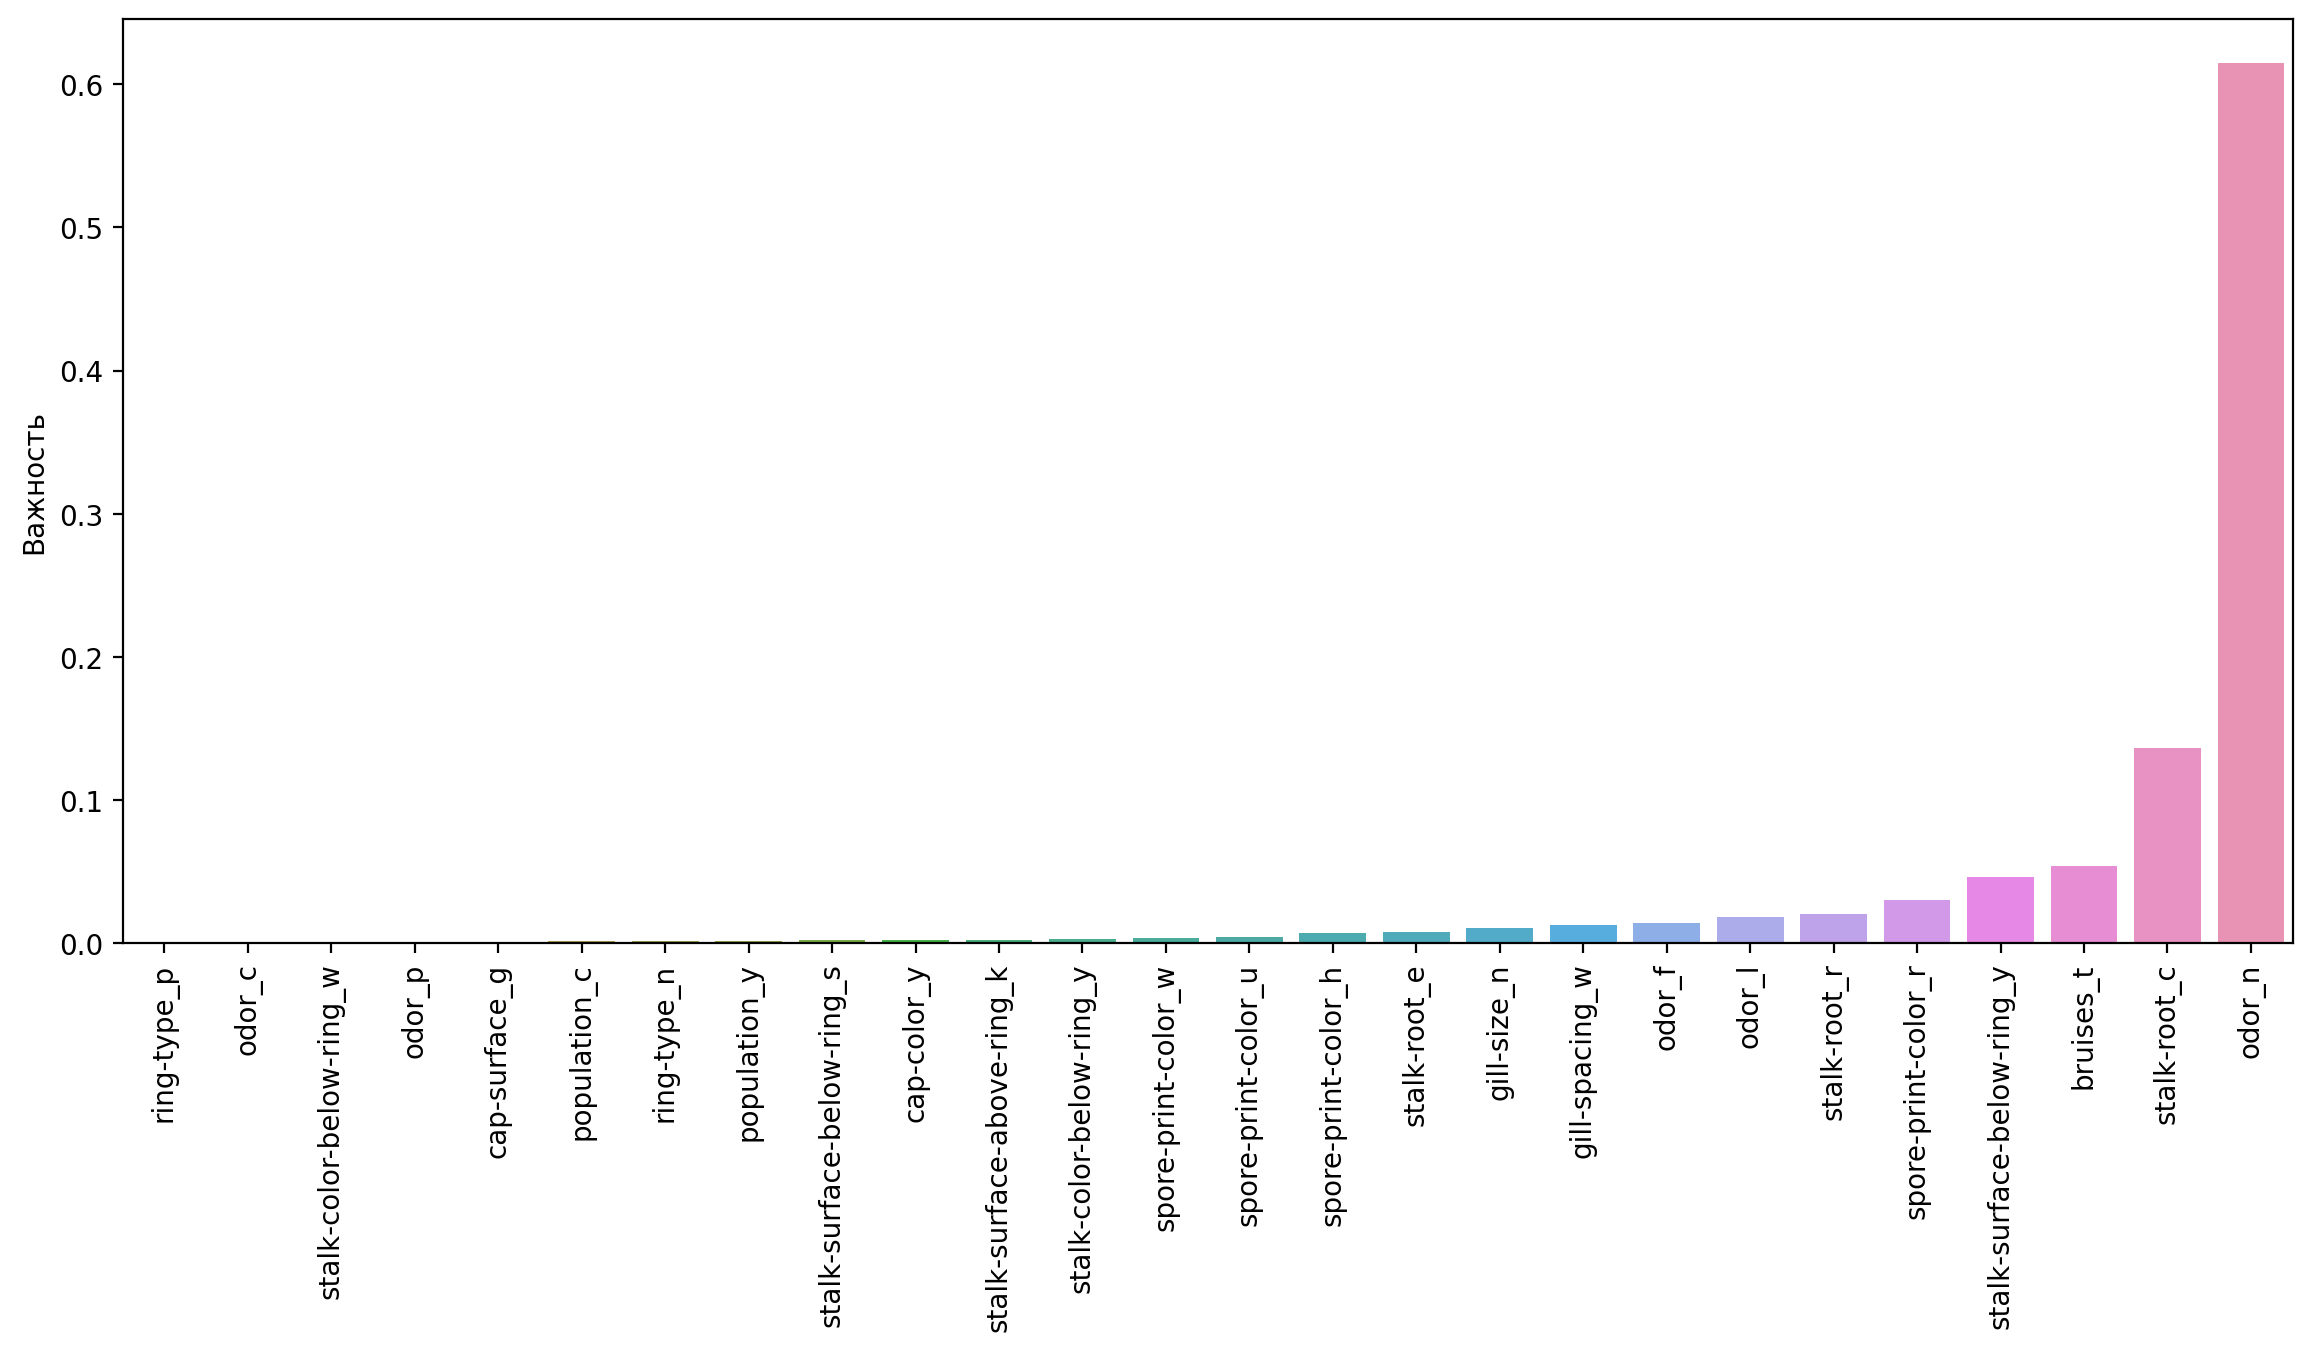

In [45]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Важность'),x=imp_feats.sort_values('Важность').index,y='Важность')
plt.xticks(rotation=90);